In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import glob
import os

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
## Checking what data we already in our Data folder using os.listdir

FOLDER = ".../GitHub/Project_3-Data_Enrichment/movie_results/2010-2020/"
file_list = sorted(os.listdir(FOLDER))
file_list

['final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz']

In [4]:
## let's check the filepath 
file_list[1]

'final_tmdb_data_2011.csv.gz'

In [5]:
## add the folder plus filename
FOLDER+ file_list[1]

'C:/Users/MiPillay1/OneDrive - MMI HOLDINGS LTD/Documents/GitHub/Project_3-Data_Enrichment/movie_results/2010-2020/final_tmdb_data_2011.csv.gz'

In [6]:
## Make a filepath query
q = FOLDER+"*.csv.gz"
print(q)

C:/Users/MiPillay1/OneDrive - MMI HOLDINGS LTD/Documents/GitHub/Project_3-Data_Enrichment/movie_results/2010-2020/*.csv.gz


In [52]:
# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)

In [16]:
## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,\r
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Manoharam,0.0,6.042,12.0,\r
4930,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.000,1.0,\r
4931,tt9913872,0.0,/a0kySBmMZ77AqmNA3pDu45GsbCp.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,800030.0,es,De la piel del Diablo,...,0.0,0.0,[],Released,NaN,De la piel del Diablo,0.0,8.200,3.0,\r
4932,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,...,0.0,71.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.700,8.0,\r


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38578 entries, 0 to 4933
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                38578 non-null  object 
 1   adult                  38568 non-null  float64
 2   backdrop_path          25925 non-null  object 
 3   belongs_to_collection  2605 non-null   object 
 4   budget                 38568 non-null  float64
 5   genres                 38568 non-null  object 
 6   homepage               10121 non-null  object 
 7   id                     38568 non-null  float64
 8   original_language      38568 non-null  object 
 9   original_title         38568 non-null  object 
 10  overview               37777 non-null  object 
 11  popularity             38568 non-null  float64
 12  poster_path            35930 non-null  object 
 13  production_companies   38568 non-null  object 
 14  production_countries   38568 non-null  object 
 15  rel

In [18]:
# remove ids that are 0
df = df.loc[ df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
1,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,\r
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,\r
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,...,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.602,10648.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Manoharam,0.0,6.042,12.0,\r
4930,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.000,1.0,\r
4931,tt9913872,0.0,/a0kySBmMZ77AqmNA3pDu45GsbCp.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,800030.0,es,De la piel del Diablo,...,0.0,0.0,[],Released,NaN,De la piel del Diablo,0.0,8.200,3.0,\r
4932,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,...,0.0,71.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.700,8.0,\r


In [19]:
df = df.reset_index(drop=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,\r
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,\r
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,...,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.602,10648.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38563,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Manoharam,0.0,6.042,12.0,\r
38564,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.000,1.0,\r
38565,tt9913872,0.0,/a0kySBmMZ77AqmNA3pDu45GsbCp.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,800030.0,es,De la piel del Diablo,...,0.0,0.0,[],Released,NaN,De la piel del Diablo,0.0,8.200,3.0,\r
38566,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,...,0.0,71.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.700,8.0,\r


In [20]:
## saving the combined csv to disk
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz',compression='gzip',index=False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r\r
0,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r\r
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r\r
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,\r\r
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,\r\r
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,...,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.602,10648.0,PG\r\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38563,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Manoharam,0.0,6.042,12.0,\r\r
38564,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.000,1.0,\r\r
38565,tt9913872,0.0,/a0kySBmMZ77AqmNA3pDu45GsbCp.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,800030.0,es,De la piel del Diablo,...,0.0,0.0,[],Released,NaN,De la piel del Diablo,0.0,8.200,3.0,\r\r
38566,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,...,0.0,71.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.700,8.0,\r\r


In [11]:
print(df.columns)

Index(['imdb_id', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'certification\r'],
      dtype='object')


In [22]:
# Strip whitespace and carriage return characters from column names
df.columns = df.columns.str.strip()

# Now the column name should be 'certification' instead of 'certification\r'


In [23]:
## Checking Certification values
df['certification'].value_counts(dropna=False)

\r\r           30257
R\r\r           3070
NR\r\r          2290
PG-13\r\r       1758
PG\r\r           813
G\r\r            276
NC-17\r\r        100
Unrated\r\r        4
Name: certification, dtype: int64

In [26]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

           30257
R           3070
NR          2290
PG-13       1758
PG           813
G            276
NC-17        100
Unrated        4
Name: certification, dtype: int64

In [27]:
# Replace blank strings in 'certification' column with 'Unrated'
df['certification'] = df['certification'].replace('', 'Unrated')

# Check the updated value counts
print(df['certification'].value_counts())

Unrated    30261
R           3070
NR          2290
PG-13       1758
PG           813
G            276
NC-17        100
Name: certification, dtype: int64


#  Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

# **Statistical test**

ANOVA Test Results: F-Value = 81.01731709740604, p-value = 2.321065961830156e-51
Rating with highest average revenue: PG-13, Average Revenue: 81684150.88339022


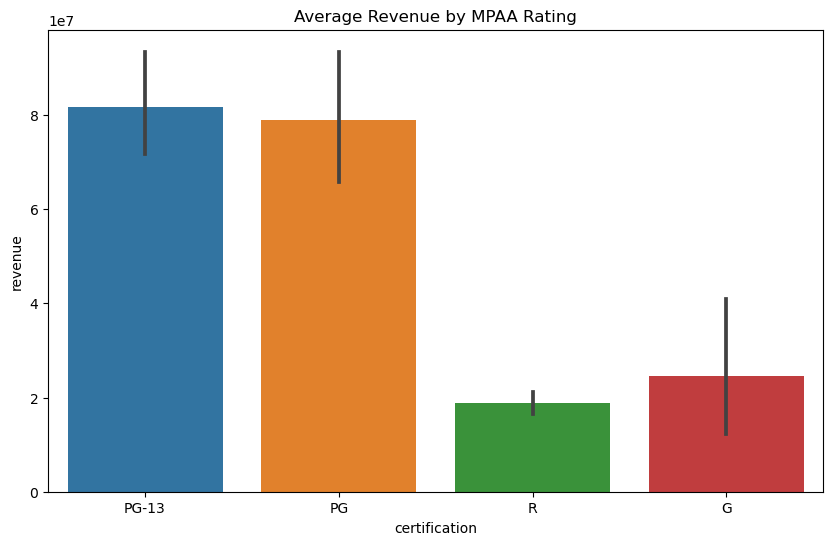

In [28]:
# Filter for relevant MPAA ratings
relevant_ratings = ['G', 'PG', 'PG-13', 'R']
df_filtered = df[df['certification'].isin(relevant_ratings)]

# ANOVA Test
f_value, p_value = stats.f_oneway(df_filtered[df_filtered['certification'] == 'G']['revenue'],
                                  df_filtered[df_filtered['certification'] == 'PG']['revenue'],
                                  df_filtered[df_filtered['certification'] == 'PG-13']['revenue'],
                                  df_filtered[df_filtered['certification'] == 'R']['revenue'])

# Print the ANOVA test results
print(f'ANOVA Test Results: F-Value = {f_value}, p-value = {p_value}')

# Determine which rating earns the most revenue
mean_revenues = df_filtered.groupby('certification')['revenue'].mean()
highest_earning_rating = mean_revenues.idxmax()

print(f"Rating with highest average revenue: {highest_earning_rating}, Average Revenue: {mean_revenues[highest_earning_rating]}")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='certification', y='revenue', data=df_filtered)
plt.title('Average Revenue by MPAA Rating')
plt.show()


# Interpretation:

**ANOVA Test Results:** F-Value = 81.01731709740604, p-value = 2.321065961830156e-51

**Rating with highest average revenue:** PG-13, Average Revenue: 81684150.88339022
 
**Highest Earning Rating:**

The MPAA rating that, on average, earns the most revenue is PG-13.
The average revenue for movies with a PG-13 rating is approximately $81,684,151.

These results indicate a highly significant difference in average revenue across different MPAA ratings (G, PG, PG-13, R). The extremely low p-value (much less than any standard significance level, such as 0.05) strongly suggests that the differences in revenue among these categories are statistically significant and not due to random chance.

# Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

# Perform the T-Test

In [29]:
# Filter the DataFrame into two groups
long_movies = df[df['runtime'] > 150]['revenue']
short_movies = df[df['runtime'] <= 90]['revenue']

# Perform t-test
t_stat, p_value = stats.ttest_ind(long_movies, short_movies, nan_policy='omit')

# Print the test results
print(f'T-test Results: t-statistic = {t_stat}, p-value = {p_value}')


T-test Results: t-statistic = 19.607549922793957, p-value = 1.038791695502654e-84


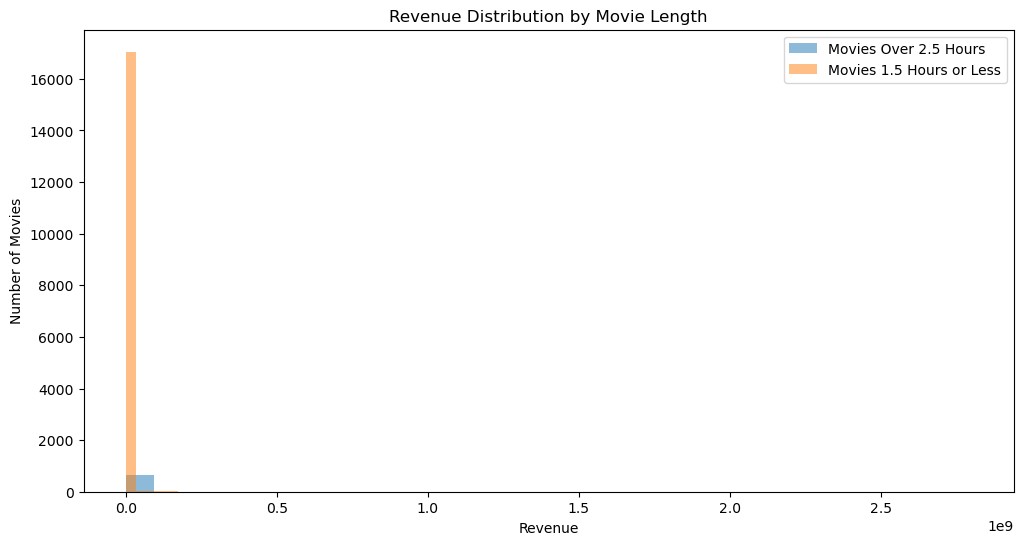

In [31]:
# Create histograms for each group
plt.figure(figsize=(12, 6))

plt.hist(long_movies, bins=30, alpha=0.5, label='Movies Over 2.5 Hours')
plt.hist(short_movies, bins=30, alpha=0.5, label='Movies 1.5 Hours or Less')

plt.title('Revenue Distribution by Movie Length')
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

# T-test Results:

t-statistic = 19.607549922793957, 

p-value = 1.038791695502654e-84

# Interpretation:

Statistical Significance: The p-value is extremely low, far below the typical alpha level of 0.05 used for statistical significance. This strongly suggests that there is a significant difference in average revenue between movies that are over 2.5 hours long and those that are 1.5 hours long or less.

Mean Differences: The high t-statistic indicates that the mean of the revenue is significantly higher for one group compared to the other. Given the positive value of the t-statistic, it's likely that longer movies (over 2.5 hours) have higher average revenue compared to shorter movies (1.5 hours or less).

# Do movies released in 2019 earn less revenue than movies released in 2017?

In [51]:
df['release_date'].value_counts(dropna=False)

2010-01-01    225
2011-01-01    190
2012-01-01    173
2014-01-01    157
2013-01-01    148
             ... 
2020-11-11      1
2016-09-04      1
2023-04-14      1
2006-02-10      1
2021-01-08      1
Name: release_date, Length: 3976, dtype: int64

In [46]:
df = df.copy()

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract the year and create a new 'release_year' column
df['release_year'] = df['release_date'].dt.year

# Drop rows where 'release_year' is NaN
df = df.dropna(subset=['release_year'])

# Convert 'release_year' to integer
df['release_year'] = df['release_year'].astype(int)

In [47]:
# Part 1: Revenue Comparison
revenue_2019 = df[df['release_year'] == 2019]['revenue']
revenue_2017 = df[df['release_year'] == 2017]['revenue']

In [48]:
t_stat, p_value = stats.ttest_ind(revenue_2019, revenue_2017, nan_policy='omit')
print(f"2019 vs 2017 Revenue Comparison: t-statistic = {t_stat}, p-value = {p_value}")

2019 vs 2017 Revenue Comparison: t-statistic = -0.7920382689990172, p-value = 0.42835899676661326


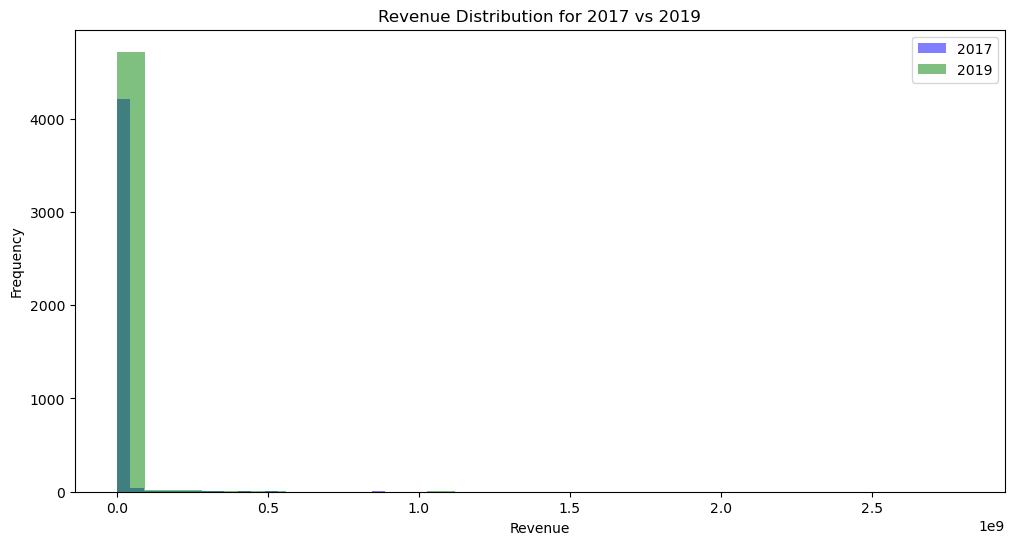

In [50]:
# Create histograms
plt.figure(figsize=(12, 6))
plt.hist(revenue_2017, bins=30, alpha=0.5, label='2017', color='blue')
plt.hist(revenue_2019, bins=30, alpha=0.5, label='2019', color='green')

plt.title('Revenue Distribution for 2017 vs 2019')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# T-test Results:

T-Statistic: -0.792

P-Value: 0.428

# Interpretation:

Statistical Significance: The p-value of 0.428 is significantly higher than the typical alpha level of 0.05 used for statistical tests. This indicates that there is no statistically significant difference in the average revenue between movies released in 2019 and those released in 2017.

Mean Difference: The negative value of the t-statistic suggests that the average revenue in 2019 is slightly lower than in 2017. However, since the p-value is not below 0.05, this difference is not considered statistically significant.

From a statistical standpoint, there is no evidence to suggest a significant change in revenue performance between these two years. This implies that other factors besides the year of release might have a more substantial impact on a movie's revenue.